In [72]:
import pandas as pd

In [73]:
column_name = ['Id', 'Name', 'Age', 'Weight','m0006','m0612','m1218','f0006','f0612','f1218']

In [74]:
df = pd.read_csv('patient_heart_rate.csv',names = column_name, header=0)

In [75]:
df.head(10)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75
5,6.0,Huey McDuck,52.0,189lbs,-,-,-,68,75,72
6,7.0,Dewey McDuck,19.0,56kgs,-,-,-,71,78,75
7,8.0,Scööpy Doo,32.0,78kgs,78,76,75,-,-,-
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df[['Firstname','Lastname']] = df['Name'].str.split(expand=True)
df = df.drop('Name',axis=1)

In [77]:
df.head(5)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


In [78]:
weight = df['Weight']

for i in range(0, len(weight)):
    x = str(weight[i])
    if 'lbs' in x[-3:]:
        x = x[:-3:]
        float_x = float(x)
        y = int(float_x/2.2)
        #y = str(y)
        weight[i]=y
    if 'kgs' in x[-3:]:
        x = x[:-3:]
        float_x = float(x)
        weight[i]=x

C:\Users\Student\AppData\Local\Temp\ipykernel_8064\2936701651.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]=x
C:\Users\Student\AppData\Local\Temp\ipykernel_8064\2936701651.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]=y
C:\Users\Student\AppData\Local\Temp\ipykernel_8064\2936701651.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i]=x
C:\Users\Student\AppData\Local\Temp\ipykernel_8064\2936701

In [79]:
df.rename(columns={'Weight':'Weight_kgs'},inplace=True)

In [80]:
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,Firstname,Lastname
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [81]:
df.dropna(how='all', inplace=True)

In [82]:
df = df.drop_duplicates(subset=['Firstname','Lastname','Age','Weight_kgs'])

In [83]:
df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df.Lastname.replace({r'[^\x00-\x7F]+':''},regex=True, inplace=True)
print(df)

      Id   Age Weight_kgs m0006 m0612 m1218 f0006 f0612 f1218 Firstname  \
0    1.0  56.0         70    72    69    71     -     -     -     Micky   
1    2.0  34.0         70     -     -     -    85    84    76    Donald   
2    3.0  16.0        NaN     -     -     -    65    69    72      Mini   
3    4.0   NaN         78    78    79    72     -     -     -   Scrooge   
4    5.0  54.0         90     -     -     -    69   NaN    75      Pink   
5    6.0  52.0         85     -     -     -    68    75    72      Huey   
6    7.0  19.0         56     -     -     -    71    78    75     Dewey   
7    8.0  32.0         78    78    76    75     -     -     -      Scpy   
11  10.0  12.0         45     -     -     -    92    95    87     Louie   
12  11.0   NaN         60    78    75    72     -     -     -     Henry   
13  12.0  34.0        NaN    65    67    55     -     -     -    Michel   
14  13.0   NaN        NaN     -     -     -    68    72    70      Tana   
15  14.0   NaN        NaN

C:\Users\Student\AppData\Local\Temp\ipykernel_8064\954498208.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Firstname.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
C:\Users\Student\AppData\Local\Temp\ipykernel_8064\954498208.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [84]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

C:\Users\Student\AppData\Local\Temp\ipykernel_8064\1258158026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)


In [85]:
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)

C:\Users\Student\AppData\Local\Temp\ipykernel_8064\1979542691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)


### melt du lieu

In [86]:
df = pd.melt(df, id_vars=['Id','Age','Weight_kgs','Firstname','Lastname'],value_name='PulseRate', var_name='gender_time').sort_values(['Id','Age','Weight_kgs','Firstname','Lastname'])

In [87]:
df

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate
0,1.0,56.0,70,Micky,Mous,m0006,72
14,1.0,56.0,70,Micky,Mous,m0612,69
28,1.0,56.0,70,Micky,Mous,m1218,71
42,1.0,56.0,70,Micky,Mous,f0006,-
56,1.0,56.0,70,Micky,Mous,f0612,-
...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,m0612,-
41,15.0,52.0,81,NaN,NaN,m1218,-
55,15.0,52.0,81,NaN,NaN,f0006,68
69,15.0,52.0,81,NaN,NaN,f0612,75


In [88]:
df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Student\AppData\Local\Temp\ipykernel_8064\394222301.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_temp = df['gender_time'].str.extract("(\D)(\d+)(\d{2})", expand=True)


In [89]:
df_temp

,0,1,2
0,m,00,06
14,m,06,12
28,m,12,18
42,f,00,06
56,f,06,12
...,...,...,...
27,m,06,12
41,m,12,18
55,f,00,06
69,f,06,12


In [90]:
df_temp.columns = ['Gender','Lower_hour','Upper_hour']

In [91]:
df = pd.concat([df,df_temp], axis=1)
df

,Id,Age,Weight_kgs,Firstname,Lastname,gender_time,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,m0006,72,m,00,06
14,1.0,56.0,70,Micky,Mous,m0612,69,m,06,12
28,1.0,56.0,70,Micky,Mous,m1218,71,m,12,18
42,1.0,56.0,70,Micky,Mous,f0006,-,f,00,06
56,1.0,56.0,70,Micky,Mous,f0612,-,f,06,12
...,...,...,...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,m0612,-,m,06,12
41,15.0,52.0,81,NaN,NaN,m1218,-,m,12,18
55,15.0,52.0,81,NaN,NaN,f0006,68,f,00,06
69,15.0,52.0,81,NaN,NaN,f0612,75,f,06,12


In [92]:
df = df.drop(['gender_time'],axis=1)
df

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
42,1.0,56.0,70,Micky,Mous,-,f,00,06
56,1.0,56.0,70,Micky,Mous,-,f,06,12
...,...,...,...,...,...,...,...,...,...
27,15.0,52.0,81,NaN,NaN,-,m,06,12
41,15.0,52.0,81,NaN,NaN,-,m,12,18
55,15.0,52.0,81,NaN,NaN,68,f,00,06
69,15.0,52.0,81,NaN,NaN,75,f,06,12


In [93]:
import numpy as np

In [94]:
df = df.replace('-',np.nan).dropna(subset=['PulseRate'])
df.head(10)

,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Micky,Mous,72,m,00,06
14,1.0,56.0,70,Micky,Mous,69,m,06,12
28,1.0,56.0,70,Micky,Mous,71,m,12,18
43,2.0,34.0,70,Donald,Duck,85,f,00,06
57,2.0,34.0,70,Donald,Duck,84,f,06,12
71,2.0,34.0,70,Donald,Duck,76,f,12,18
44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06
58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12
72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06


In [97]:
df['Firstname'].isnull().sum


<bound method Series.sum of 0     False
14    False
28    False
43    False
57    False
71    False
44    False
58    False
72    False
3     False
17    False
31    False
46    False
74    False
47    False
61    False
75    False
48    False
62    False
76    False
7     False
21    False
35    False
50    False
64    False
78    False
9     False
23    False
37    False
10    False
24    False
38    False
53    False
67    False
81    False
55     True
69     True
83     True
Name: Firstname, dtype: bool>

In [98]:
df['Lastname'].isnull().sum

<bound method Series.sum of 0     False
14    False
28    False
43    False
57    False
71    False
44    False
58    False
72    False
3     False
17    False
31    False
46    False
74    False
47    False
61    False
75    False
48    False
62    False
76    False
7     False
21    False
35    False
50    False
64    False
78    False
9     False
23    False
37    False
10    False
24    False
38    False
53    False
67    False
81    False
55     True
69     True
83     True
Name: Lastname, dtype: bool>

In [99]:
df['Firstname'].fillna('Unknown', inplace=True)

In [100]:
df['Lastname'].fillna('Unknown', inplace=True)

In [101]:
df = df.reset_index()

In [102]:
df.to_csv('patient_heart_rate_clean.csv')

### Câu 1: Vẽ biểu đồ cột thể hiện tỉ lệ bệnh nhân nam và nữ


In [104]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --------------------------------- ------ 6.6/7.8 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 32.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 37.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [106]:
import matplotlib.pyplot as plt

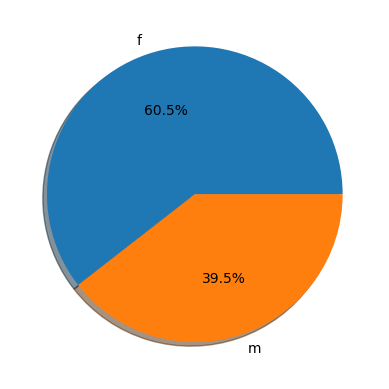

In [113]:
gb = df.groupby(['Gender'])['Id'].agg(['count'])

labels = gb.index
data = list(gb['count'])

plt.pie(data, labels=labels,autopct='%1.1f%%', shadow=True)
plt.show()

### Câu 2: Tạo cột Fullname = Firstname+''+Lastname

In [111]:
df['Fullname'] = df['Firstname'].str.cat(df['Lastname'], sep=' ')
df

,index,Id,Age,Weight_kgs,Firstname,Lastname,PulseRate,Gender,Lower_hour,Upper_hour,Fullname
0,0,1.0,56.0,70,Micky,Mous,72,m,00,06,Micky Mous
1,14,1.0,56.0,70,Micky,Mous,69,m,06,12,Micky Mous
2,28,1.0,56.0,70,Micky,Mous,71,m,12,18,Micky Mous
3,43,2.0,34.0,70,Donald,Duck,85,f,00,06,Donald Duck
4,57,2.0,34.0,70,Donald,Duck,84,f,06,12,Donald Duck
5,71,2.0,34.0,70,Donald,Duck,76,f,12,18,Donald Duck
6,44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06,Mini Mouse
7,58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12,Mini Mouse
8,72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18,Mini Mouse
9,3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06,Scrooge McDuck


In [114]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [115]:
import seaborn as sns

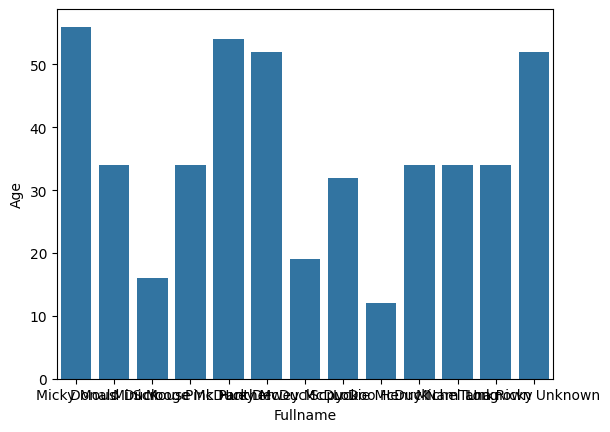

In [117]:
sns.barplot(x='Fullname', y='Age', data=df)
plt.show()

In [120]:
import numpy as np

In [121]:
grouped_mean = df.groupby('Id')['PulseRate'].mean()
print(grouped_mean)

TypeError: agg function failed [how->mean,dtype->object]